# DecisionTree
---

# 결정트리(분류) 학습과 시각화

### iris 
    - 꽃잎 길이, 꽃잎 너비 두 컬럼 활용 
    

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

* 트리 깊이 2로 설정하여 학슴 
    - max_depth = 2 : 화살표 층이 두개

In [2]:
iris = load_iris()
X = iris['data'][:, 2:]
y = iris['target']

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

# 트리 시각화

In [20]:
 import graphviz
from sklearn.tree import export_graphviz

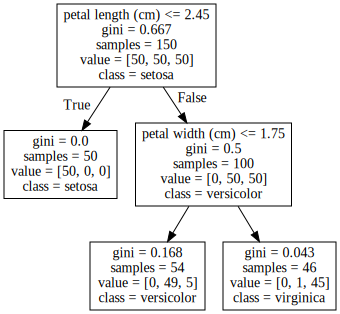

In [30]:
feature_name = iris.feature_names[2:]
tree = export_graphviz(tree_clf, feature_names=feature_name, 
                      class_names = iris.target_names)
graphviz.Source(tree)

# 예측하기

In [38]:
X[[100]]

array([[6. , 2.5]])

In [39]:
y[[100]]

array([2])

In [40]:
tree_clf.predict(X[[100]])

array([2])

    - 클래스 2인 샘플데이터를 넣어본 결과 2 클래스로 잘 예측한다.

In [41]:
tree_clf.predict([[5.5, 2.4]])

array([2])

    - 임의로 5.5, 2.4를 넣어본 결과 2 클래스로 분류한다.

# 클래스 확률 추정

In [42]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

### 클래스 1임에 큰 확신을 갖고 있다! 

In [43]:
tree_clf.predict([[5, 1.5]])

array([1])

### 실제로 클래스 1이 맞았다!

# 회귀

In [44]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2)

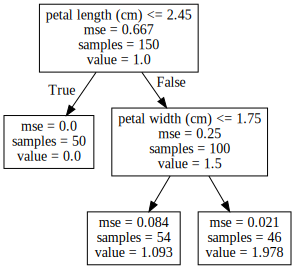

In [45]:
feature_name = iris.feature_names[2:]
tree = export_graphviz(tree_reg, feature_names=feature_name, 
                      class_names = iris.target_names)
graphviz.Source(tree)

---
# 분포 시각화

In [47]:
import matplotlib.pyplot as plt

In [53]:
import pandas as pd
import numpy as np

In [55]:
df = pd.DataFrame(data=iris['data'], columns=iris.feature_names)

In [60]:
df['species'] = iris.target

In [93]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


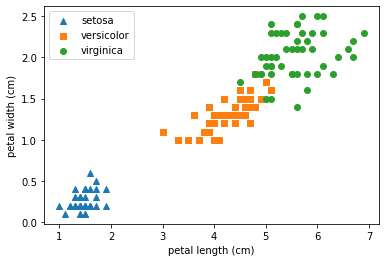

In [92]:
marker = ['^', 's', 'o']

for i, marker in enumerate(marker):
    x_val = df[df['species']==i]['petal length (cm)']
    y_val = df[df['species']==i]['petal width (cm)']
    plt.scatter(x_val, y_val, marker = marker, label = iris.target_names[i])
    
    
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()
plt.show()

# 그래프 시각화 함수 만듦
- species 별 마커 다르게 표시하여 분포 확인할 수 있도록 함

In [100]:
def iris_plot(x, y):
    marker = ['^', 's', 'o']

    for i, marker in enumerate(marker):
        x_val = df[df['species']==i][x]
        y_val = df[df['species']==i][y]
        plt.scatter(x_val, y_val, marker = marker, label = iris.target_names[i])
    
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend()
   

> ## cf) plt.subplots()
ex. plt.subplots(221) : 2 x 2 자리에서 첫번째 (첫째 행 첫째 열) 자리에 넣어주세요

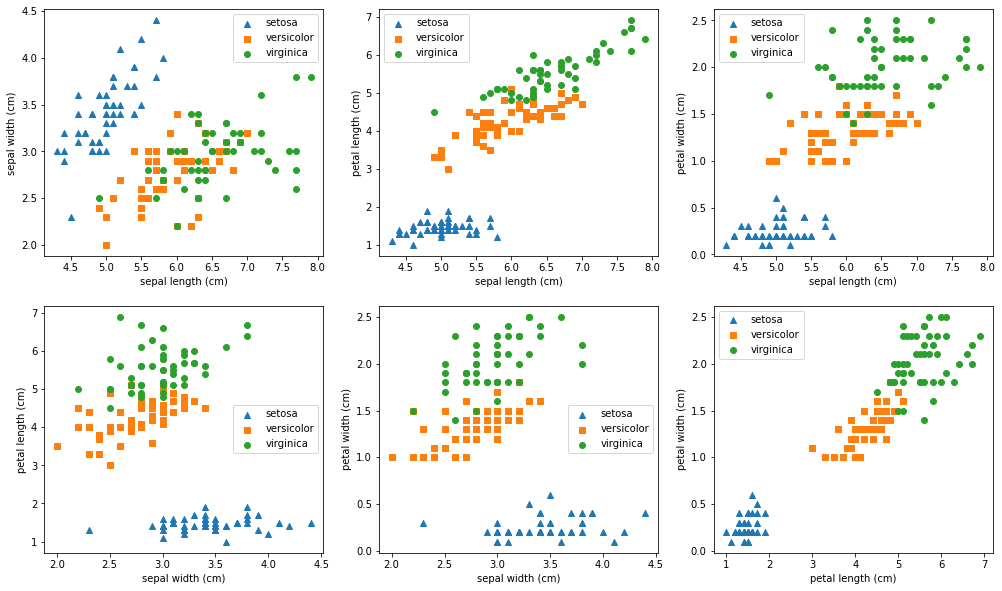

In [114]:
plt.figure(figsize=(17, 10))
plt.subplot(231); iris_plot('sepal length (cm)', 'sepal width (cm)')
plt.subplot(232); iris_plot('sepal length (cm)', 'petal length (cm)')
plt.subplot(233); iris_plot('sepal length (cm)', 'petal width (cm)')
plt.subplot(234); iris_plot('sepal width (cm)', 'petal length (cm)')
plt.subplot(235); iris_plot('sepal width (cm)', 'petal width (cm)')
plt.subplot(236); iris_plot('petal length (cm)', 'petal width (cm)')
plt.show()

> ### * setosa가 가장 구분짓기 좋다
> ### * virginica, versicolor는 비슷하다.
> ### * sepal_length, sepal_width 조합으로는 versicolor, virginica 구분짓기 매우 어려울 듯.


## 적절한 max_depth 구하기

In [117]:
X = df.drop(['species'], axis=1)
y = df[['species']]

In [118]:
from sklearn.model_selection import train_test_split

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [115]:
from sklearn.metrics import r2_score

## max_depth 변동에 따른  r2 값 시각화

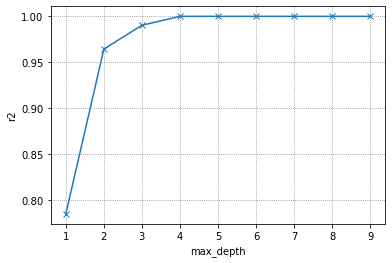

In [151]:
r2_l = []

for i in range(1, 10):
    dt = DecisionTreeRegressor(max_depth=i)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2_l.append(r2)

plt.plot(range(1, 10), r2_l, 'x-')
plt.xlabel('max_depth')
plt.ylabel('r2')
plt.grid(color='gray', linestyle =':')
plt.show()

## max_depth 변동에 따른  mse 값 시각화

In [139]:
from sklearn.metrics import mean_squared_error

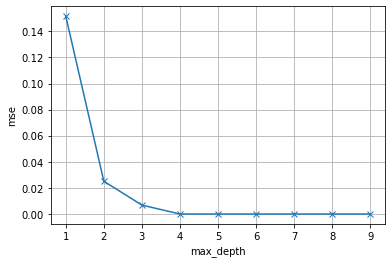

In [152]:
mse_l = []

for i in range(1, 10):
    dt = DecisionTreeRegressor(max_depth=i)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_l.append(mse)

plt.plot(range(1, 10), mse_l, 'x-')
plt.xlabel('max_depth')
plt.ylabel('mse')
plt.grid(':')
plt.show()

> ### * r2가 너무 높을 경우 과대적합 발생우려 / mse가 너무 낮으면 과대적합 발생우려 
=> max_depth = 3이 적절하다고 생각한다.